In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory
import cv2

2024-08-17 16:10:13.989762: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-17 16:10:13.989903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-17 16:10:14.114979: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df="/kaggle/input/waste-classification-data/DATASET/TRAIN/"
training_data=image_dataset_from_directory(
df,
seed=123,
shuffle=True,
image_size=(224,224))

Found 22564 files belonging to 2 classes.


In [10]:
val_df="/kaggle/input/waste-classification-data/DATASET/TEST/"
validation_data=image_dataset_from_directory(
val_df,
seed=123,
shuffle=True,
image_size=(224,224))

Found 2513 files belonging to 2 classes.


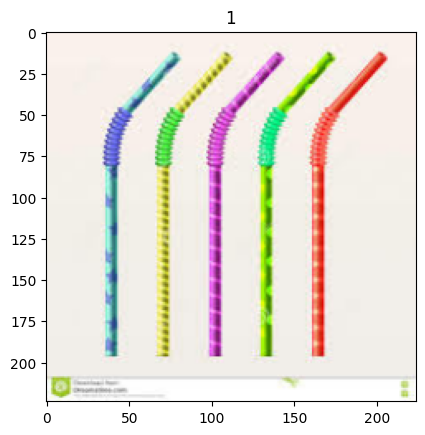

In [36]:
for image,label in validation_data.take(1):
    vimg=image
    vlabel=label
    plt.imshow(image[5].numpy().astype('uint64'))
    plt.title(f"{label[5]}")
    plt.show()

In [4]:
np.unique(label)

array([0, 1], dtype=int32)

In [5]:
image.shape

TensorShape([32, 224, 224, 3])

In [60]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,TimeDistributed,Input,Dropout,LSTM,GRU
from keras.initializers import HeNormal
from keras.regularizers import l2
from keras.models import Model
from keras.callbacks import EarlyStopping

In [55]:
early_stopping=EarlyStopping(
monitor='val_loss',
patience=5,
verbose=1)

In [8]:
inputs=Input(shape=(224,224,3))
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)
f=Flatten()(b)
d=Dense(32,activation="relu")(f)
outputs=Dense(1,activation="sigmoid")(d)
model=Model(inputs,outputs)
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
model.fit(training_data,epochs=5,validation_data=validation_data,callbacks=[early_stopping])

Epoch 1/5
705/706 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8167 - loss: 1.1875

W0000 00:00:1723911743.221647     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


706/706 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.8167 - loss: 1.1874 - val_accuracy: 0.7485 - val_loss: 1.3026
Epoch 2/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.8354 - loss: 0.9626 - val_accuracy: 0.7417 - val_loss: 1.1289
Epoch 3/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.8666 - loss: 0.7638 - val_accuracy: 0.4425 - val_loss: 2590.5994
Epoch 4/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.7966 - loss: 1.2785 - val_accuracy: 0.7453 - val_loss: 0.9203
Epoch 5/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.8505 - loss: 0.6966 - val_accuracy: 0.8205 - val_loss: 0.8287


In [46]:
loss,accuracy=model.evaluate(validation_data)
vimg_batch = np.expand_dims(vimg[0], axis=0)

y_pred=model.predict(vimg_batch)
print("predicted value address on label :",np.argmax(y_pred))
print("label value:",vlabel)
print(y_pred)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8158 - loss: 0.8513
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted value address on label : 0
label value: tf.Tensor([0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0], shape=(32,), dtype=int32)
[[0.48694763]]


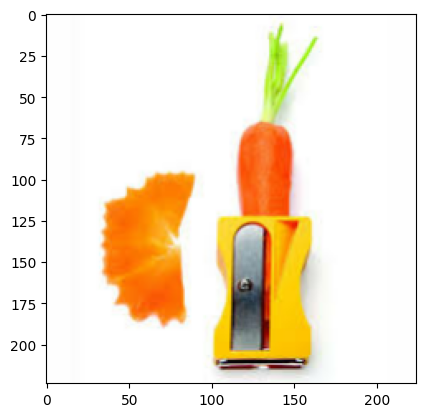

In [48]:
plt.imshow(vimg[0].numpy().astype('uint64'))
plt.show()

In [52]:
inputs=Input(shape=(224,224,3))
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)

dr=Dropout(0.5)(b)
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(dr)
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)

f=Flatten()(b)
d=Dense(64,activation="relu")(f)
d=Dense(32,activation="relu")(d)
outputs=Dense(1,activation="sigmoid")(d)
modelc4=Model(inputs,outputs)
modelc4.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [57]:
modelc4.fit(training_data,epochs=50,validation_data=validation_data,callbacks=[early_stopping])

Epoch 1/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.8944 - loss: 0.3382 - val_accuracy: 0.5858 - val_loss: 1.2130
Epoch 2/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.9003 - loss: 0.3158 - val_accuracy: 0.8376 - val_loss: 0.5089
Epoch 3/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.9163 - loss: 0.2707 - val_accuracy: 0.8388 - val_loss: 0.4433
Epoch 4/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 53s 74ms/step - accuracy: 0.9267 - loss: 0.2501 - val_accuracy: 0.5854 - val_loss: 9.4024
Epoch 5/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 52s 74ms/step - accuracy: 0.9245 - loss: 0.2538 - val_accuracy: 0.8408 - val_loss: 0.5374
Epoch 6/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.9410 - loss: 0.2139 - val_accuracy: 0.6964 - val_loss: 11.3728
Epoch 7/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.9526 - loss: 0.1795 - val_accuracy: 0.6912 - val_loss: 1.3798
Epoch 8/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 53s 74ms/step - accuracy: 0.9531 - loss: 0.1719 -

In [58]:
loss2,accuracy2=modelc4.evaluate(validation_data)
vimg_batch2 = np.expand_dims(vimg[0], axis=0)

y_pred2=modelc4.predict(vimg_batch2)
print("predicted value address on label :",np.argmax(y_pred2))
print("label value:",vlabel[0])
# print(y_pred)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7967 - loss: 1.2213
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
predicted value address on label : 0
label value: tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
plt.imshow(vimg[0].numpy().astype('uint64'))
plt.show()

In [67]:
inputs=Input(shape=(224,224,3))
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)

dr=Dropout(0.5)(b)
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(dr)
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)

dr=Dropout(0.5)(b)
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(dr)
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)
x = TimeDistributed(Flatten())(b)
x = LSTM(50, return_sequences=False)(x)

f=Flatten()(x)
d=Dense(64,activation="relu")(f)
d=Dense(32,activation="relu")(d)
outputs=Dense(1,activation="sigmoid")(d)
modelc6=Model(inputs,outputs)
modelc6.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [69]:
modelc6.fit(training_data,epochs=50,batch_size=32,validation_data=validation_data,callbacks=[early_stopping])

Epoch 1/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 102s 144ms/step - accuracy: 0.8105 - loss: 0.5344 - val_accuracy: 0.8918 - val_loss: 0.4312
Epoch 2/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 101s 143ms/step - accuracy: 0.8201 - loss: 0.4742 - val_accuracy: 0.7827 - val_loss: 0.5044
Epoch 3/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 102s 145ms/step - accuracy: 0.8361 - loss: 0.4367 - val_accuracy: 0.8679 - val_loss: 0.4376
Epoch 4/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 102s 144ms/step - accuracy: 0.8419 - loss: 0.4153 - val_accuracy: 0.8078 - val_loss: 0.4449
Epoch 5/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 102s 145ms/step - accuracy: 0.8509 - loss: 0.4005 - val_accuracy: 0.6228 - val_loss: 0.7129
Epoch 6/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 102s 145ms/step - accuracy: 0.8540 - loss: 0.3886 - val_accuracy: 0.8102 - val_loss: 0.4385
Epoch 6: early stopping


In [70]:
loss3,accuracy3=modelc6.evaluate(validation_data)
vimg_batch3 = np.expand_dims(vimg[0], axis=0)

y_pred3=modelc6.predict(vimg_batch3)
print("predicted value address on label :",np.argmax(y_pred3))
print("label value:",vlabel[0])
# print(y_pred)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7958 - loss: 0.4553
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
predicted value address on label : 0
label value: tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
plt.imshow(vimg[0].numpy().astype('uint64'))
plt.show()